In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [86]:
PATH = '../Proyecto/Crop_recommendation.csv'
df = pd.read_csv(PATH)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [87]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [88]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [89]:
names = pd.unique(df['label'].values.ravel())
names = pd.Series(np.arange(len(names)), names)
names = pd.DataFrame({"label": names.index, "labelID": names.values})
names

,label,labelID
0,rice,0
1,maize,1
2,chickpea,2
3,kidneybeans,3
4,pigeonpeas,4
5,mothbeans,5
6,mungbean,6
7,blackgram,7
8,lentil,8
9,pomegranate,9


In [90]:
df_merge = pd.merge(df, names)
df_merge.head()

,N,P,K,temperature,humidity,ph,rainfall,label,labelID
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


<AxesSubplot:>

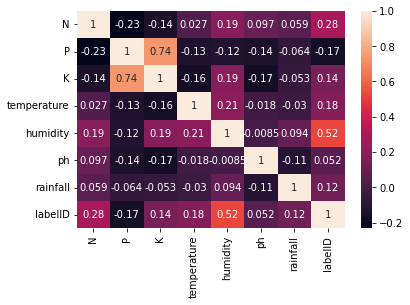

In [91]:
sns.heatmap(df_merge.corr(), annot = True)

In [92]:
features = df_merge[['P', 'K', 'temperature', 'humidity', 'ph']]
target = df_merge['label']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2, random_state = 2)

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [96]:
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(Xtrain, Ytrain)

predicted_values = SVM.predict(Xtest)

accuracy = accuracy_score(Ytest, predicted_values)

print("SVM's with linear kernel accuracy: ", accuracy, "\n")

SVM's with linear kernel accuracy:  0.9022727272727272 



In [97]:
SVM = SVC(kernel = 'sigmoid', random_state = 0)
SVM.fit(Xtrain, Ytrain)

predicted_values = SVM.predict(Xtest)

accuracy = accuracy_score(Ytest, predicted_values)

print("SVM's with sigmoid kernel accuracy: ", accuracy, "\n")

SVM's with sigmoid kernel accuracy:  0.6681818181818182 



In [98]:
SVM = SVC(kernel = 'rbf', random_state = 0)
SVM.fit(Xtrain, Ytrain)

predicted_values = SVM.predict(Xtest)

accuracy = accuracy_score(Ytest, predicted_values)

print("SVM's with rbf kernel accuracy: ", accuracy, "\n")

SVM's with rbf kernel accuracy:  0.9045454545454545 



In [99]:
predicted_values

array(['coffee', 'coconut', 'pomegranate', 'cotton', 'mungbean', 'coffee',
       'watermelon', 'coconut', 'pigeonpeas', 'mango', 'chickpea', 'jute',
       'papaya', 'pigeonpeas', 'mango', 'maize', 'orange', 'blackgram',
       'cotton', 'orange', 'banana', 'kidneybeans', 'muskmelon', 'banana',
       'mango', 'kidneybeans', 'coconut', 'coconut', 'jute', 'mungbean',
       'pomegranate', 'chickpea', 'mungbean', 'mungbean', 'mothbeans',
       'coffee', 'cotton', 'muskmelon', 'blackgram', 'blackgram', 'jute',
       'pomegranate', 'pomegranate', 'jute', 'mango', 'pomegranate',
       'pomegranate', 'mungbean', 'coffee', 'chickpea', 'coffee',
       'lentil', 'cotton', 'pigeonpeas', 'cotton', 'pigeonpeas',
       'mungbean', 'banana', 'lentil', 'orange', 'mungbean', 'jute',
       'pigeonpeas', 'grapes', 'pigeonpeas', 'grapes', 'grapes',
       'pomegranate', 'coffee', 'cotton', 'apple', 'orange', 'chickpea',
       'mango', 'banana', 'maize', 'banana', 'rice', 'pomegranate',
       'mu

In [100]:
cm = confusion_matrix(Ytest, predicted_values)
print(cm)

[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  1  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 18  3  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  0  1  0  2 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  2 12  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [101]:
realValuesVSPredictedValues = pd.DataFrame({'Real Values': Ytest, 'Predicted Values': predicted_values})
realValuesVSPredictedValues

,Real Values,Predicted Values
2121,coffee,coffee
960,pomegranate,coconut
952,pomegranate,pomegranate
1958,cotton,cotton
681,mungbean,mungbean
...,...,...
1684,orange,orange
1477,muskmelon,muskmelon
851,lentil,lentil
370,kidneybeans,kidneybeans
